# Changes in HbA1c Levels During COVID-19 

This notebook describes trends and deviations in HbA1c test results during the COVID-19 pandemic at large and by specific demographic groups. In particular, I report the trends across the mean of test results by month. 

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob

pd.set_option('display.max_rows', None)

In [80]:
def compute_mean(group): 
    """
    Computes mean HbA1c levels by demographic group & month.
    
    Arg: 
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'diabetes_type'
                     
    Returns:
        Dataframe (df): Dataframe of means by month
    """
    return pd.DataFrame(df_input.groupby(by=['date',group])['hba1c_mmol_per_mol'].mean()).reset_index()
    
def create_chart(group, df):
    """
    Outputs chart demonstrating trends in HbA1c levels by 
    demographic group & month.
    
    Args: 
        group (str): Demographic group such as 'age_group', 
                     'sex', 'imd', 'region', and 'diabetes_type'
        df (df): Dataframe of means by month
    """
    plt.figure(figsize = (15,8))
    if group=='population':
        ax = sns.lineplot(x = 'date', y = 'hba1c_mmol_per_mol', data = df)
    else:
        ax = sns.lineplot(x = 'date', y = 'hba1c_mmol_per_mol', hue = group, data = df)
    locs, labels = plt.xticks()
    plt.xlabel('Date')
    plt.ylabel('HbA1c (mmol/mol)')
    plt.setp(labels, rotation=65)
    plt.show()

In [81]:
# Read in input files
li = []

for file in glob('../output/data/input*'):
    df = pd.read_csv(file)
    df['date'] = file[21:-4]
    li.append(df)
    
df_input = pd.concat(li, axis=0, ignore_index=False).reset_index(drop=True)

## Population

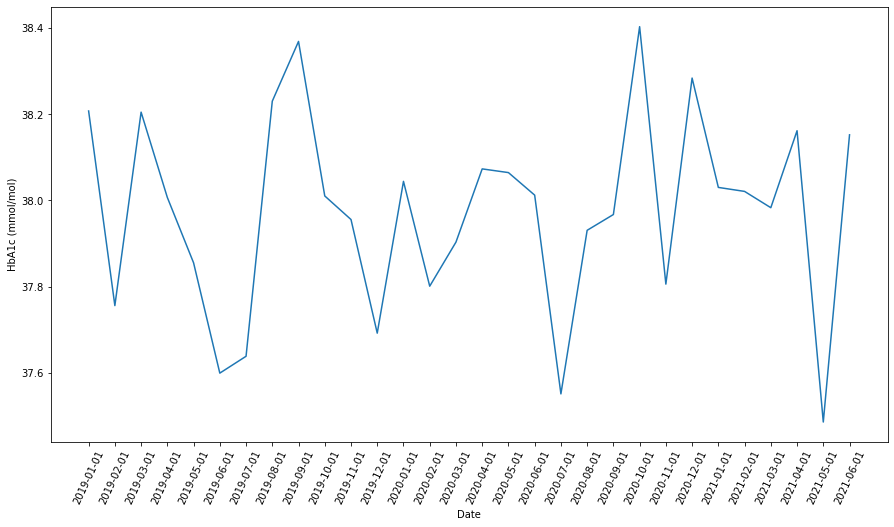

In [84]:
df_pop = pd.DataFrame(df_input.groupby(by=['date'])['hba1c_mmol_per_mol'].mean())
create_chart('population', df_pop)

## Age 

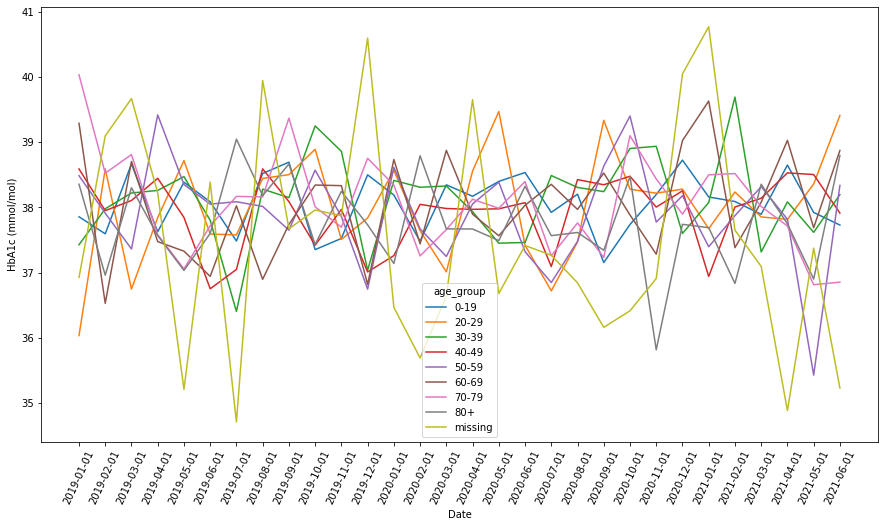

In [85]:
df_age = compute_mean('age_group')
create_chart('age_group', df_age)

## Sex 

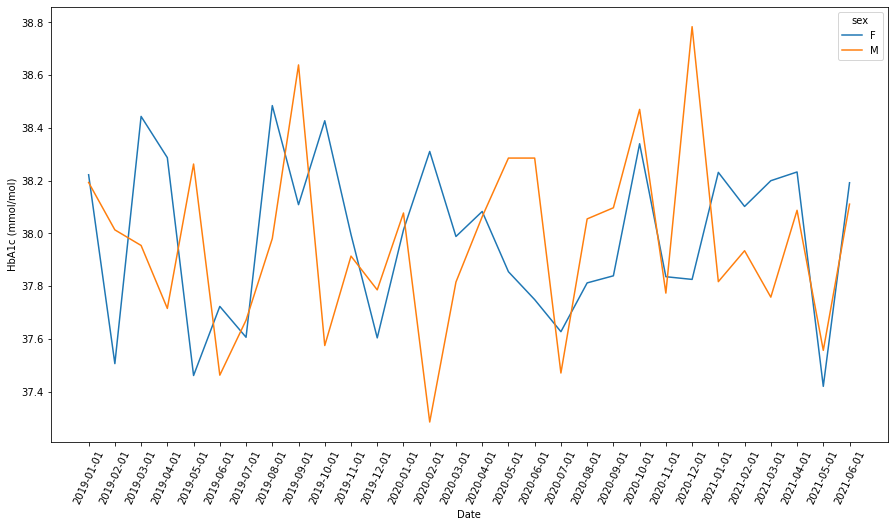

In [86]:
df_sex = compute_mean('sex')
create_chart('sex', df_sex)

## Region 

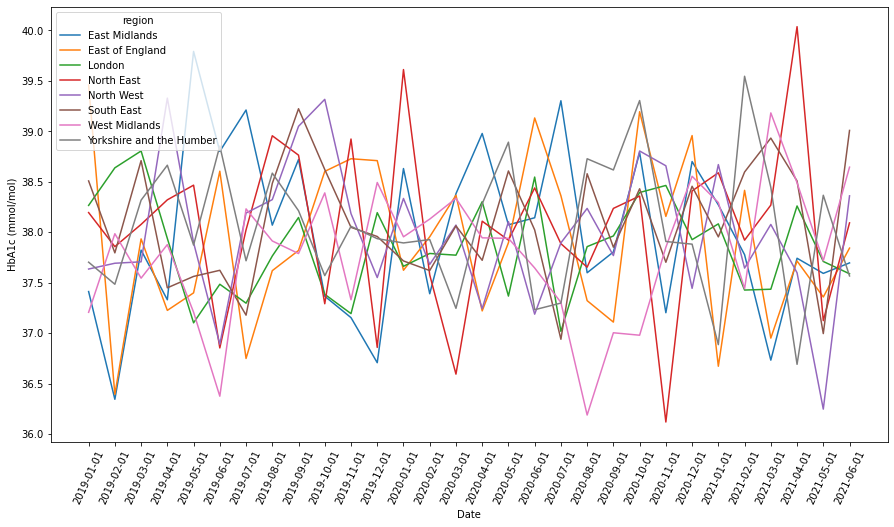

In [87]:
df_region = compute_mean('region')
create_chart('region', df_region)

## IMD

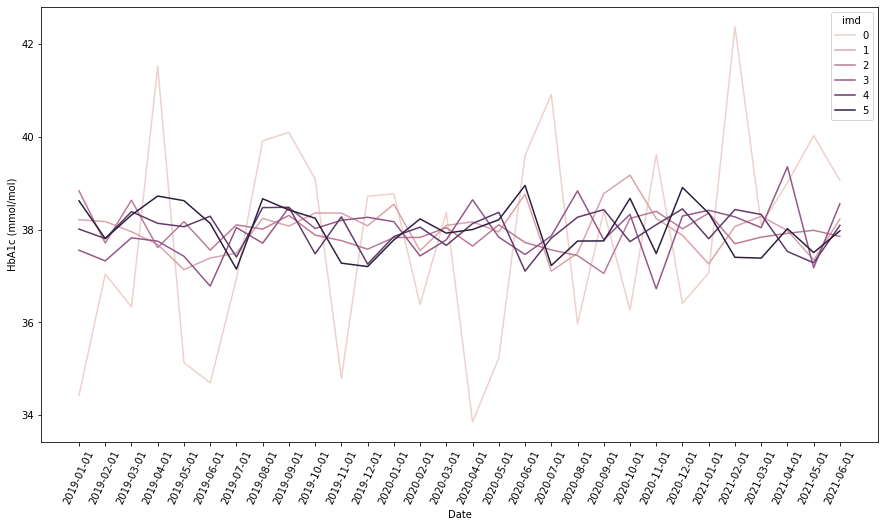

In [88]:
df_imd = compute_mean('imd')
create_chart('imd', df_imd)

## Diabetes Type

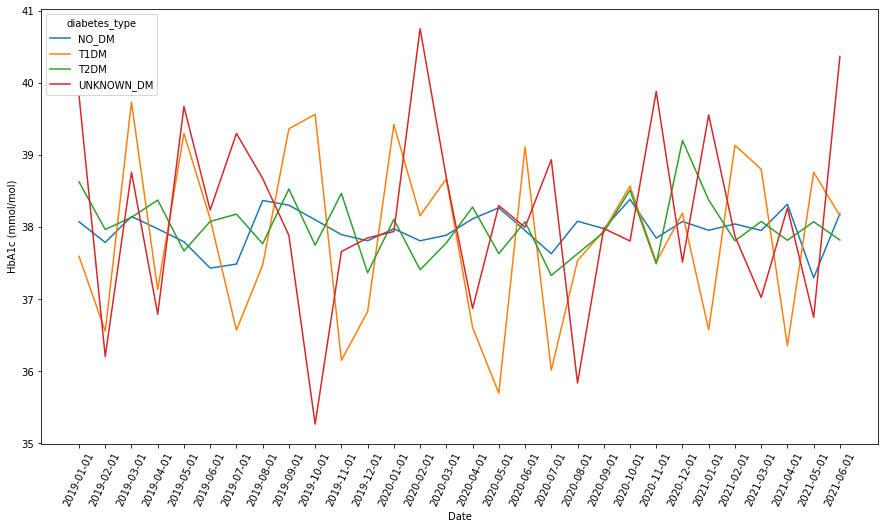

In [89]:
df_dt = compute_mean('diabetes_type')
create_chart('diabetes_type', df_dt)